# Binary search

In [1]:
def binsearch(a,x):
    left = 0; right = len(a)-1
    while left<=right:    
        mid = int((left + right)/2)
        if a[mid]==x: return mid 
        if x < a[mid]: right = mid-1
        else: left = mid+1
    return -1

In [2]:
binsearch(range(10), 333)

-1

In [3]:
def binsearch(a,x,left,right):
    print(left, right)
    if left > right: return -1
    mid = int((left + right)/2)
    if a[mid]==x: return mid 
    if x < a[mid]:
        return binsearch(a,x,left,mid-1)
    else:
        return binsearch(a,x,mid+1,right)

a = range(10)
n = len(a)
binsearch(a,5,0,n-1)

0 9
5 9
5 6


5

# Rabin-Karp hash search

In [4]:
def hash(s:str)->int:
    return sum(ord(c) for c in s)

def search(doc, s) -> int:
    n = len(doc); m = len(s)
    hs = hash(s)
    for i in range(0,n-m+1):
        hdoc = hash(doc[i:i+m]) # slow O(m)
        if hdoc==hs and s==doc[i:i+m]:
            return i
    return -1

In [5]:
doc = """Porchetta food truck Roli Roti and the Mission’s Dynamo Donut
are teaming up once again on a one-day-only donut porchetta sandwich,
which is exactly what it sounds like. The donuts serving as bread are
flavored with onion and thyme, holding juicy slices of porchetta straight
from the rotisserie."""

In [6]:
search(doc, "Roli Roti"), search(doc, "Porch"), search(doc, "foobar"), search(doc, "rie.")

(21, 0, -1, 292)

In [7]:
def hash(s:str, n)->int:
    return sum(ord(s[i]) for i in range(n))

def search(doc, s) -> int:
    n = len(doc); m = len(s)
    hs = hash(s,m)
    hdoc = hash(doc,m)  # init rolling hash
    for i in range(0,n-m+1):
        # print(f"i={i}, n={n}, m={m}")
        if hdoc==hs and s==doc[i:i+m]:
            return i
        next = ord(doc[i+m]) if i+m<n else 0
        hdoc = hdoc - ord(doc[i]) + next  # roll it!
    return -1

In [8]:
search(doc, "Roli Roti"), search(doc, "Porch"), search(doc, "foobar"), search(doc, "rie.")

(21, 0, -1, 292)

# Tries

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from dtreeviz.trees import *
from lolviz import *

import numpy as np
import pandas as pd

## Construction

In [10]:
class TrieNode:
    def __init__(self):
        self.edges = {}

In [11]:
def add(p:TrieNode, s:str, i=0) -> None:
    if i>=len(s): return
    if s[i] not in p.edges:
        p.edges[s[i]] = TrieNode()
    add(p.edges[s[i]], s, i+1)

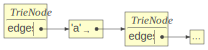

In [12]:
root = TrieNode()
add(root, "a")
objviz(root)

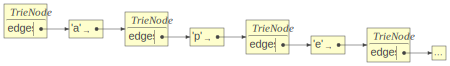

In [13]:
add(root, "ape")
objviz(root)

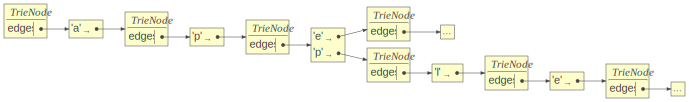

In [14]:
add(root, "apple")
objviz(root)

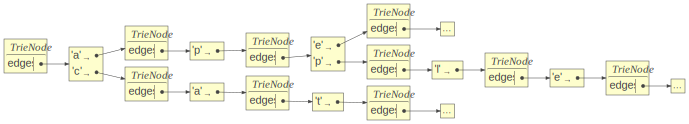

In [15]:
add(root, "cat")
objviz(root)

## Searching

In [16]:
def search(root:TrieNode, s:str, i=0) -> bool:
    "Return true if s is prefix of word in Trie or full word in Trie"
    p = root
    while p is not None:
        if i>=len(s): return True
        if s[i] not in p.edges: return False
        p = p.edges[s[i]]
        i += 1
    return True

In [17]:
search(root, "apple"), search(root, "appl"), search(root, "ape"), search(root, "apf")

(True, True, True, False)

## Fast dictionary implementation

In [18]:
class TrieNode:
    def __init__(self):
        self.edges = [] # init edges, one per a..z letter
        for c in range(ord('a'), ord('z')+1): self.edges.append(None)

In [19]:
def add(p:TrieNode, s:str, i=0) -> None:
    if i>=len(s): return
    e = ord(s[i]) - ord('a')
    if p.edges[e] is None:
        p.edges[e] = TrieNode()
    add(p.edges[e], s, i+1)

In [20]:
def search(root:TrieNode, s:str, i=0) -> bool:
    "Return true if s is prefix of word in Trie or full word in Trie"
    p = root
    while p is not None:
        if i>=len(s): return True
        e = ord(s[i]) - ord('a')
        if p.edges[e] is None: return False
        p = p.edges[e]
        i += 1
    return True

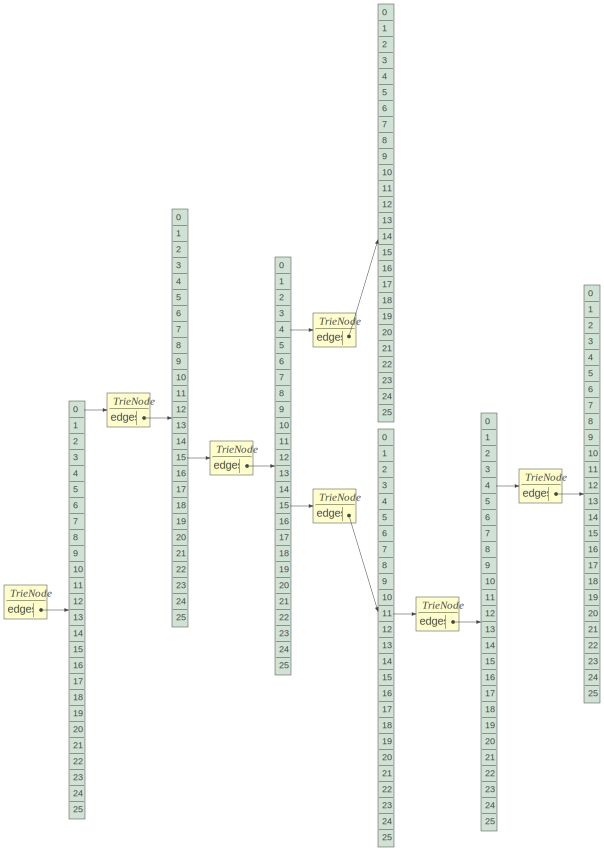

In [21]:
root = TrieNode()
add(root, "ape")
add(root, "apple")
objviz(root)

In [22]:
search(root, "apple"), search(root, "appl"), search(root, "ape"), search(root, "apf")

(True, True, True, False)